# Exploratory Data Analysis in Python for Beginners
#### Code Written by Muhammad Fawad Ul Hassan Sarim
I am using 100,000 UK Used Car Data set. Details can be found here [100,000 UK Used Car Dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)

I have uploaded the dataset on my [Github](https://github.com/fawadsarim/Exploratory-Data-Analysis-in-Python-for-Beginners) and I will clone the repo from my Github. You can download the notebook or use it in Google Colab.

## Downloading Necessary Libraries and Relevant Data

In [1]:
!git clone https://github.com/fawadsarim/Exploratory-Data-Analysis-in-Python-for-Beginners ExploratoryDataAnalysisRepo

Cloning into 'ExploratoryDataAnalysisRepo'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


Dataset covers multiple companies and the list is given down below. You can change the name of the company in the cell below to conduct exploratory data analysis for the company of your own choice. I am choosing BMW for now! My every Finding and Interpretation of the analysis is related to BMW Dataset only.

1.	audi
2.	bmw
3.	cclass
4.	focus
5.	ford
6.	hyundi
7.	merc
8.	skoda
9.	toyota
10.	unclean cclass
11.	unclean focus
12.	vaixhall
13.	vw





In [2]:
!pip install -r ./ExploratoryDataAnalysisRepo/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Necessary Libraries

In [3]:
#Importing necessary libraries for conducting exploratory data analysis!
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('ggplot')

## Selecting Specific Company from Multiple Automobile Companies

In [4]:
companiesdataset = './ExploratoryDataAnalysisRepo/100,000 UK Used Car Data set'

nameofcompany = 'bmw.csv'

selecteddata = os.path.join(companiesdataset,nameofcompany)
if os.path.exists(selecteddata):
  print("Data Successfully Selected!\n")
else:
  print(f"File {selecteddata} not found!")

Data Successfully Selected!



## Getting Started by Loading dataset in a Dataframe and Exploring the Dataset

In [5]:
df = pd.read_csv(selecteddata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [6]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [7]:
#validating number of models
df['model'].nunique()

24

In [8]:
#validating year of manufacture
df['year'].unique()

array([2014, 2018, 2016, 2017, 2015, 2019, 2013, 2020, 2002, 2004, 2007,
       2008, 2011, 2012, 2009, 2006, 2010, 2003, 2001, 2005, 2000, 1999,
       1996, 1997, 1998])

In [9]:
#generating descriptive statistics of the numeric variables
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


## Exploratory Analysis

### Target Variable - Price

Since we need to predict the price, the price variable would be our target variable. We apply log transforamtion of the price variable as histogram on the left below, we can see there is a longer right tail. After this slight modification the distribution on the right below is close to normal distribution.

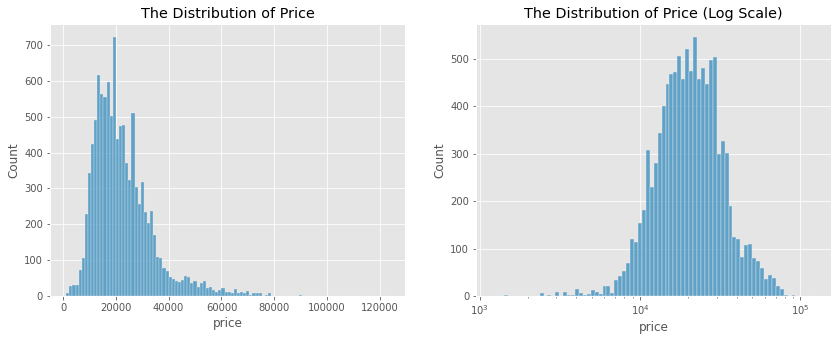

In [10]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot(df['price'],ax=axes[0]).set(title='The Distribution of Price')
sns.histplot(df['price'],log_scale=True,ax=axes[1]).set(title='The Distribution of Price (Log Scale)');

In [11]:
#applying log on price column to modify the dataset as well
df['price'] = np.log(df['price'])

### Numeric Variables Heatmap - Tax, mpg, Engine Size, Year, Price, Mileage

From the heatmap below, we can conclude that there is a moderate linear positive relationship between price in log transformation and engine size and year. Also, there is a moderate to strong linear negative linear negative relationship between year and mileage.

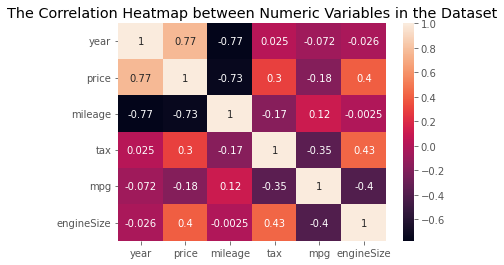

In [12]:
sns.heatmap(df.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables in the Dataset');

### Distribution about year and engine size
In the dataset, price is more related to the year and the engine size. After checking the distribution it was found that the distribution of year variable is skewed towards left. Distribution of Engine Size variable is skewed towards right.

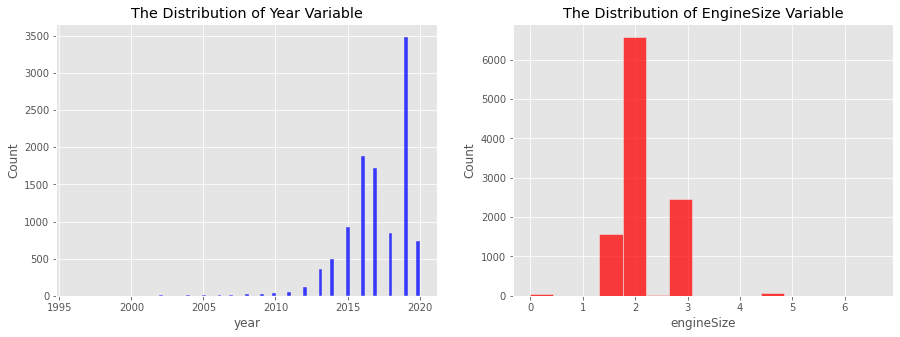

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['year'],color = 'blue',ax=axes[0]).set(title='The Distribution of Year Variable')
sns.histplot(df['engineSize'], color = 'red',ax=axes[1]).set(title='The Distribution of EngineSize Variable');

### Investigating Relationship between mpg, tax, mileage and price
Since heatmap created above did not provided enough information to me to interpret that there exists a linear relationship between mpg, tax and mileage and price variable. Scatter plots comes very handy to investigate relationship between numerical variables. I decided to make scatterplot to further investigate their non-linear relationship.
It was found that:


1.   There is a linear relationship between Price and Mileage
2.   There is no relationship between price and mpg
3.   In scatter plot of price and tax I noticed some clusters so I decided to create a new ordinal variable from the tax variable based on the clusters in the scatter plot

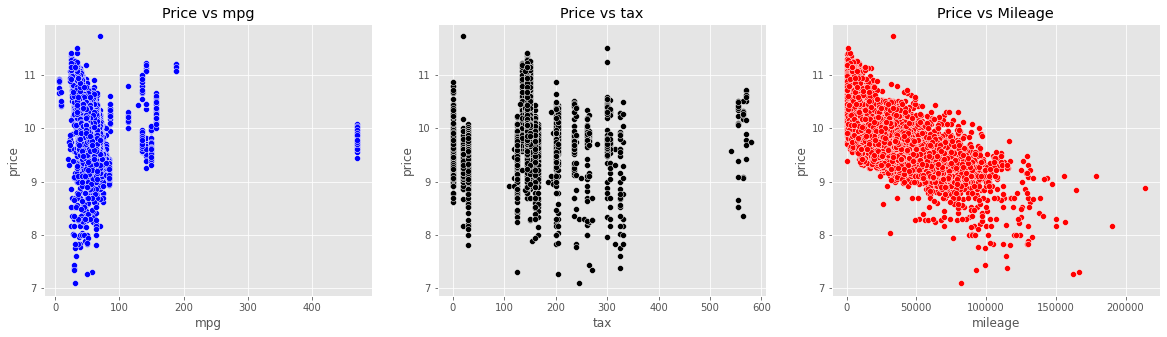

In [14]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(y=df['price'],x=df['mpg'],color ='blue',ax=axes[0]).set(title='Price vs mpg')
sns.scatterplot(y=df['price'],x=df['tax'],color = 'black', ax=axes[1]).set(title='Price vs tax')
sns.scatterplot(y=df['price'],x=df['mileage'],color = 'red',ax=axes[2]).set(title='Price vs Mileage');

In [15]:
# Convert tax variable into an ordinal variable  
df.loc[(df['tax'] <= 100,'tax')] = 1
df.loc[((df['tax'] <= 200) & (df['tax'] > 100) ,'tax')] = 2
df.loc[((df['tax'] <= 300) & (df['tax'] > 200) ,'tax')] = 3
df.loc[(df['tax'] > 300 ,'tax')] = 4

### Categorical Variables - Model, Transmission, fuelType

From the bar charts below, we can view the popular model of BMW listing, 3 series being the most popular model and 1 series is the second most popular model.
It can also be observed that Diesel is the duel type for most of the models and petrol is less than the 50% of the Diesel.
Semi Automatic is the most popular trasmission while automatic is the second one. 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


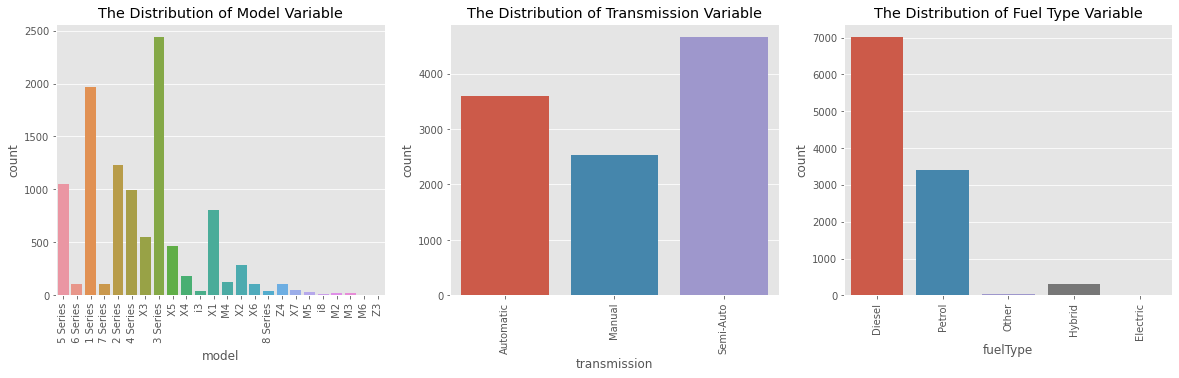

In [16]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.countplot(df['model'],ax=axes[0]).set(title='The Distribution of Model Variable')
sns.countplot(df['transmission'],ax=axes[1]).set(title='The Distribution of Transmission Variable')
sns.countplot(df['fuelType'],ax=axes[2]).set(title='The Distribution of Fuel Type Variable')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

### Investigating relation of Model, Transmission and FuelType variable with price

I have also explored the relation of Model, Transmission and FuelType variables with price. From the boxplots below, we can see there is a difference in distribution of prices among each categories in each variable.

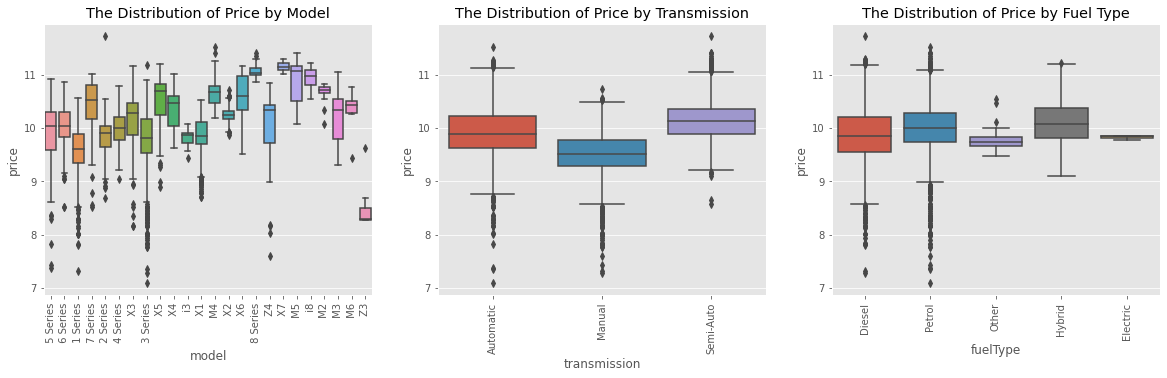

In [17]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df, x='model',y='price',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=df, x='transmission',y='price',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=df, x='fuelType',y='price',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);